In [1]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed
np.random.seed(42)

In [2]:
def simulate_scratches():
    '''Simulate choosing of scratches, 4 unique values that are the result of the sum of 2 dice'''
    
    # Define keys to be the scratches for 5/10/15/20 cents
    keys = [0.05, 0.1, 0.15, 0.2]
    
    # Create empty list of values to be populated below
    values = []
    
    # While the length of values is less than 4...
    while len(values) < 4:
        # Simulate rolling of 2 dice and taking sum
        dice = np.random.randint(low = 1, high = 7, size = 2).sum()
        # If the summed value is not already in values, append it to the list
        if dice not in values:
            values.append(dice)
    
    # Create scratches dictionary
    scratches = dict(zip(keys, values))   
    
    # Print scratches dictionary
    print(f"Scratches are {scratches}")
    return(scratches)

In [3]:
# Test simulate scratches function
scratches = simulate_scratches()

Scratches are {0.05: 9, 0.1: 8, 0.15: 7, 0.2: 6}


In [4]:
def simulate_gameplay():
    '''This function simulates gameplay for the horsey game. 
    
       This includes setting the horses to starting line, simulating the scratches, paying 
       scratches in hand into the pot, each player rolling the die (and either paying into 
       the pot or moving the horse forward) until one horse reaches the finish line'''
    
    # Set up racetrack with all horses starting at 0
    racetrack = {i:0 for i in range(2,13)}
    
    # Simulate scratches
    scratches = simulate_scratches()
    
    # Scratches in hand pay into pot (assuming all cards dealt even if uneven between players)
    pot = 0.05*4 + 0.10*4 + 0.15*4 + 0.20*4
    
    # Set keys to be the horse IDs (2 to 12)
    keys = range(2,13)
    
    # Set values to be the number of times each horse must move to reach the finish line
    values = [6, 7, 8, 9, 10, 11, 10, 9, 8, 7, 6]
    
    # Define finish_line dictionary (taking the horse ID and racetrack length)
    finish_line = dict(zip(keys, values))
    
    # Until a horse reaches the finish line...
    while True:
        # Roll dice
        dice = np.random.randint(low = 1, high = 7, size = 2).sum()
        print(f"Roll is {dice}.")

        # If roll is one of the scraches pay into the pot
        if dice in scratches.values():
            pot += float(list(scratches.keys())[list(scratches.values()).index(dice)])
            print(f"Pot increases to {round(pot, 2)}")
        # Otherwise, move the horse forward 1 spot
        else:
            racetrack[dice] += 1
            print(f"Racetrack moves {racetrack}")
            # If a horse reaches the finish line, they are the winner and the round ends
            if racetrack[dice] == finish_line[dice]:
                winner = dice
                print(f"The winner is {winner}")
                break
           
    # Return horse ID for scraches, horse ID for the winner, and the total pot value
    return(scratches[0.05], scratches[0.1], scratches[0.15], scratches[0.2], winner, round(pot, 2))

In [5]:
# Simulate gameplay
simulate_gameplay()

Scratches are {0.05: 8, 0.1: 7, 0.15: 11, 0.2: 6}
Roll is 12.
Racetrack moves {2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 1}
Roll is 6.
Pot increases to 2.2
Roll is 6.
Pot increases to 2.4
Roll is 6.
Pot increases to 2.6
Roll is 11.
Pot increases to 2.75
Roll is 5.
Racetrack moves {2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 1}
Roll is 4.
Racetrack moves {2: 0, 3: 0, 4: 1, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 1}
Roll is 5.
Racetrack moves {2: 0, 3: 0, 4: 1, 5: 2, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 1}
Roll is 8.
Pot increases to 2.8
Roll is 12.
Racetrack moves {2: 0, 3: 0, 4: 1, 5: 2, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 2}
Roll is 9.
Racetrack moves {2: 0, 3: 0, 4: 1, 5: 2, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 0, 12: 2}
Roll is 8.
Pot increases to 2.85
Roll is 4.
Racetrack moves {2: 0, 3: 0, 4: 2, 5: 2, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 0, 12: 2}
Roll is 8.
Pot increases to 2.9
Roll is 6.
Pot increases to 3.1
Roll is 6.

(8, 7, 11, 6, 4, 6.0)

In [6]:
%%capture
# The magic command above suppresses the printed output of the simulate_gameplay function

# Loop through simulate_gameplay function 100000 times saving the results in list
results = []
for i in range(100000):
    result = simulate_gameplay()
    results.append(result)

In [7]:
# Create a dataframe from results
df = pd.DataFrame(results, columns=['s5', 's10', 's15', 's20', 'winner', 'pot'])

In [8]:
# View first few lines of df
df.head()

,s5,s10,s15,s20,winner,pot
0,4,9,10,8,7,4.85
1,9,8,2,6,5,3.50
2,8,5,4,2,9,3.65
3,4,9,7,11,6,3.80
4,4,7,5,11,8,5.20


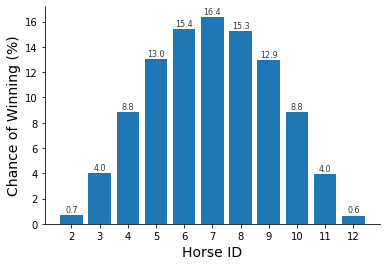

In [9]:
# Graph barplot of chance of winner for each horse

# Create figure and subplot
fig, ax = plt.subplots()

# Create barplot of chance of winner for each horse
p1 = ax.bar(df['winner'].value_counts(normalize = True).index, 
            df['winner'].value_counts(normalize = True).values*100)

# Set x-ticks so that a label appears for each horse
ax.set_xticks(range(2, 13))

# Add labels on top of the bars with chance of winning rounded to 1 decimal
ax.bar_label(p1, fontsize=8, padding = 1, fmt = '%.1f', color = '#2e3945')

# Add x and y axis labels
ax.set_xlabel('Horse ID', fontsize = 14)
ax.set_ylabel('Chance of Winning (%)', fontsize = 14)

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axes colour and width
plt.rcParams['axes.edgecolor']='#2e3945'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#2e3945'
plt.rcParams['ytick.color']='#2e3945'

# Show plot
plt.savefig('winner.png', bbox_inches='tight')
plt.show();

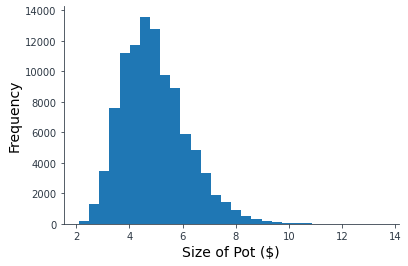

In [10]:
# Graph histogram of pot sizes

# Create figure and subplot
fig, ax = plt.subplots()

# Create histogram of pot sizes
ax.hist(df['pot'], bins = 30)

# Add x and y axis labels
ax.set_xlabel('Size of Pot ($)', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axes colour and width
plt.rcParams['axes.edgecolor']='#2e3945'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#2e3945'
plt.rcParams['ytick.color']='#2e3945'

# Show plot
plt.savefig('pot.png', bbox_inches='tight')
plt.show();

In [11]:
# Calculate summary statistics for pot column
df['pot'].describe()

count    100000.000000
mean          4.948181
std           1.214917
min           2.100000
25%           4.050000
50%           4.800000
75%           5.650000
max          13.550000
Name: pot, dtype: float64

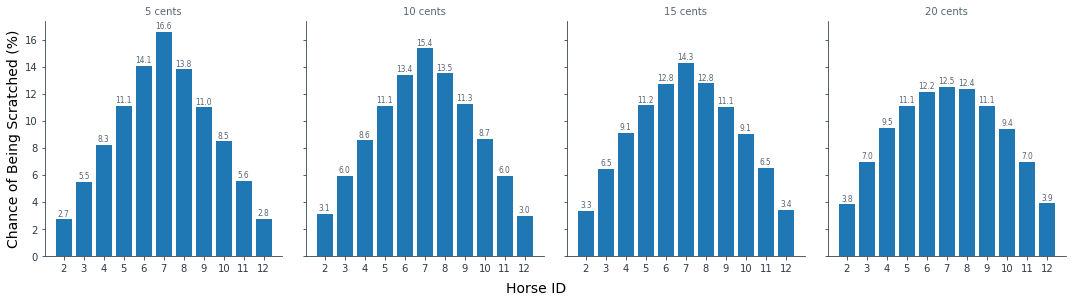

In [12]:
# Graph histograms of the changes of each horse being chosen for each progressive scratch

# Set up a figure with 4 subplots horizontally
fig, axes = plt.subplots(1, 4, figsize = (15, 4), sharey=True)

# Loop through each subplot...
for (i, ax), label in zip(enumerate(axes), [5, 10, 15, 20]):
    
    # Create a normalized barplot for each scratch 
    p = ax.bar(df['s' + str(label)].value_counts(normalize = True).index, 
            df['s' + str(label)].value_counts(normalize = True).values*100)
    
    # Add labels for each bar with their chance of winning value on top
    ax.bar_label(p, fontsize=7.5, padding = 1, fmt = '%.1f', color = '#586675')
    
    # Add a title to each subplot with the monetary value of each scratch
    ax.set_title(str(label) + ' cents', fontsize = 10, color = '#586675')
    
    # Set x-ticks so that a label appears for each horse
    ax.set_xticks(range(2, 13))
    
    # Remove top and right border
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Add x and y axis labels
axes[0].set_ylabel('Chance of Being Scratched (%)', fontsize = 14)
fig.text(0.5, -0.03, 'Horse ID', ha='center', fontsize = 14)

# Set axes colour and width
plt.rcParams['axes.edgecolor']='#2e3945'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#2e3945'
plt.rcParams['ytick.color']='#2e3945'

# Use tight layout to reduce space between each subplot
fig.tight_layout(w_pad=2)

# Show plot
plt.savefig('scratches.png', bbox_inches='tight')
plt.show();